In [1]:
from dataloader import *
from model import *
import pandas as pd
import matplotlib.pyplot as plt

/home/jovyan/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# check train and val loss and acc curves

In [9]:
results_path = "/home/jovyan/face-recognition-model-development/train/result/v1.0.0/results.csv"
results_df = pd.read_csv(results_path)
results_df.tail()

,epoch,train_loss,val_loss,train_acc,val_acc,train_time_taken,val_time_taken
55,55,0.1407,1.7347,93.46,63.66,302.36,20.36
56,56,0.1264,1.7055,94.17,64.41,302.05,20.37
57,57,0.1258,1.6849,94.50,65.08,302.15,20.29
58,58,0.1258,1.7013,93.83,64.93,302.05,20.47
59,59,0.1248,1.7013,93.83,65.45,302.50,20.46


LOSS PLOTS


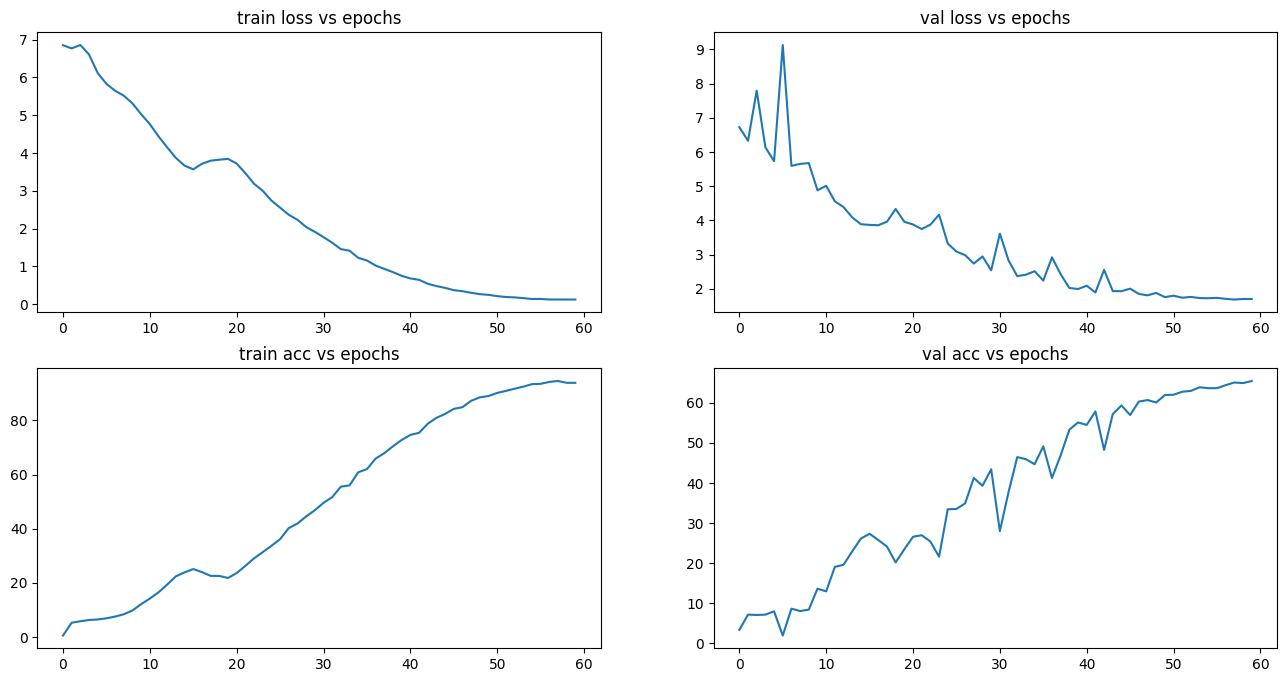

In [10]:
print("LOSS PLOTS")

train_acc_list = results_df.train_acc.tolist()
val_acc_list = results_df.val_acc.tolist()
train_loss_list = results_df.train_loss.tolist()
val_loss_list = results_df.val_loss.tolist()

fig,ax=plt.subplots(2,2,figsize=(16,8))
plt.subplot(2,2,1)
plt.plot(train_loss_list)
plt.title('train loss vs epochs')


plt.subplot(2,2,2)
plt.plot(val_loss_list)
plt.title('val loss vs epochs')

plt.subplot(2,2,3)
plt.plot(train_acc_list)
plt.title('train acc vs epochs')


plt.subplot(2,2,4)
plt.plot(val_acc_list)
plt.title('val acc vs epochs')

plt.show()

In [25]:
lrs_path = "/home/jovyan/face-recognition-model-development/train/result/v1.0.0/lrs.csv"
lrs_df = pd.read_csv(lrs_path)
lrs_df.tail()

,lr
55,0.000105
56,0.000071
57,0.000044
58,0.000025
59,0.000014


LEARNING RATE PLOT


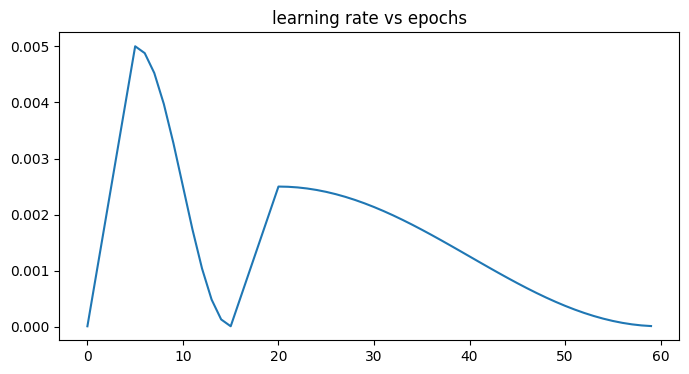

In [27]:
# plot LR curves
print("LEARNING RATE PLOT")

fig,ax=plt.subplots(1,1,figsize=(8,4))
plt.subplot(1,1,1)
plt.plot(lrs_df.lr.tolist())
plt.title('learning rate vs epochs')

plt.show()

# check model performance on test set

In [34]:
from dataloader import *
from model import *

from torch.utils.data import DataLoader

In [35]:
input_data_folder = "/home/jovyan/face-recognition-model-development/lfw_dataset/lfw_face_processed.csv"
label_int_mapping_path = "/home/jovyan/face-recognition-model-development/lfw_dataset/lfw_labels_int_mapping.pkl"
input_dim = 512
seed = 1
num_workers = 4
batch_size = 32

In [76]:
# setup test dataset 
test_dataset = LFW_Dataset(input_data_folder, label_int_mapping_path, split_type = 'test', input_dim = input_dim ,seed = seed, augmentation = False, preload = False)

In [45]:
# load best model

load_model = '/home/jovyan/face-recognition-model-development/train/result/v1.0.0/weights/best_model.pt'
num_classes = 902 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = FaceNet(num_classes=num_classes,pretrained='vggface2')
model=model.to(device)
if load_model:
    model.load_state_dict(torch.load(os.path.join('./result', load_model), map_location = device))
    _ = model.eval()
if device==torch.device('cuda'):
    model = nn.DataParallel(model)

In [75]:
from torch.nn.functional import softmax
from tqdm import tqdm

num_corr = 0
for image,label in tqdm(test_dataset):
    logits = model(image.unsqueeze(0))
    softmax_output = softmax(logits,dim=1)
    prediction = torch.argmax(softmax_output)
    if prediction.item() == label.item():
        num_corr+=1

print(f'test dataset accuracy: {num_corr/len(test_dataset)}')

100%|██████████| 915/915 [00:38<00:00, 24.06it/s]

test dataset accuracy: 0.6808743169398908
